In [1]:
from fastai.vision.all import *

In [2]:
# Ruta
path = Path('.')

In [3]:
# Cargar los datos
data = ImageDataLoaders.from_folder(
    path, 
    train="train", 
    valid="valid", 
    test="test",
    item_tfms=Resize(64),
    batch_tfms=aug_transforms(size=64),
)

c:\Users\chema\AppData\Local\Programs\Python\Python310\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [4]:
# Definir el modelo
learn = cnn_learner(data, resnet34, metrics=accuracy)

c:\Users\chema\AppData\Local\Programs\Python\Python310\lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [5]:
# Entrenar el modelo
learn.fine_tune(epochs=5)

epoch,train_loss,valid_loss,accuracy,time
0,4.278805,5.889054,0.090909,00:01


epoch,train_loss,valid_loss,accuracy,time
0,4.308678,5.104923,0.090909,00:02
1,4.060596,4.289298,0.127273,00:01
2,3.928465,3.651505,0.200000,00:01
3,3.721757,3.285900,0.236364,00:02
4,3.605150,3.100270,0.236364,00:01


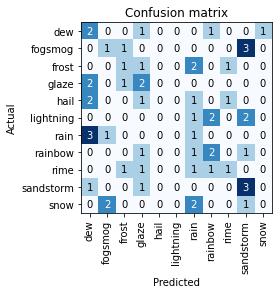

In [6]:
# Evaluar el modelo con el conjunto de test
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [7]:

# Guardar el modelo entrenado
learn.export('weather_model.pkl')


In [9]:
accuracy_test = learn.validate()[1]
print('Accuracy on test set:', accuracy_test)

Accuracy on test set: 0.23636363446712494
